In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from plotnine import *
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [15]:
data = load_boston()

In [26]:
boston = pd.DataFrame(data['data'], columns = data['feature_names'])
boston['MEDV'] =  data['target']

In [27]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


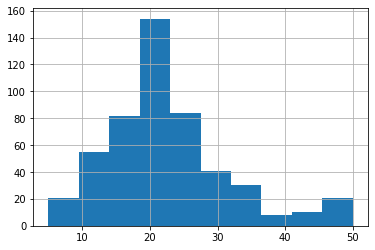

In [28]:
boston.MEDV.hist()

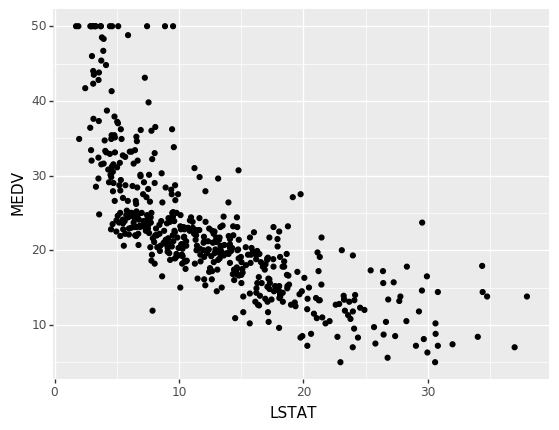

<ggplot: (-9223371898368916788)>

In [29]:
ggplot(aes(x = 'LSTAT', y = 'MEDV'), data = boston) + geom_point() 

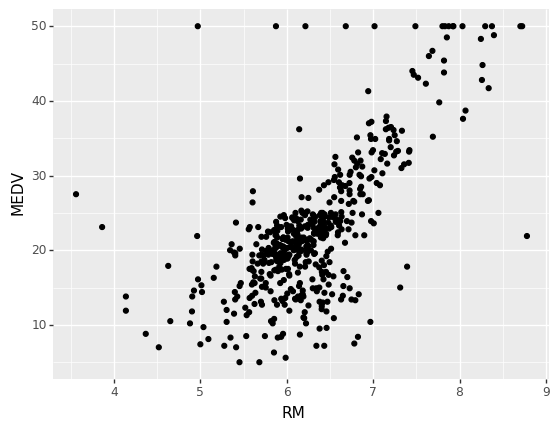

<ggplot: (-9223371898365180428)>

In [30]:
ggplot(aes(x = "RM", y = "MEDV"), data = boston) + geom_point()

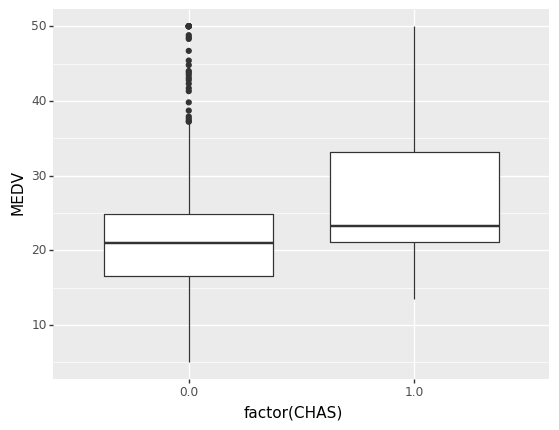

<ggplot: (-9223371898365509328)>

In [31]:
ggplot(aes(x = 'factor(CHAS)', y = 'MEDV'), data = boston) + geom_boxplot()

In [32]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


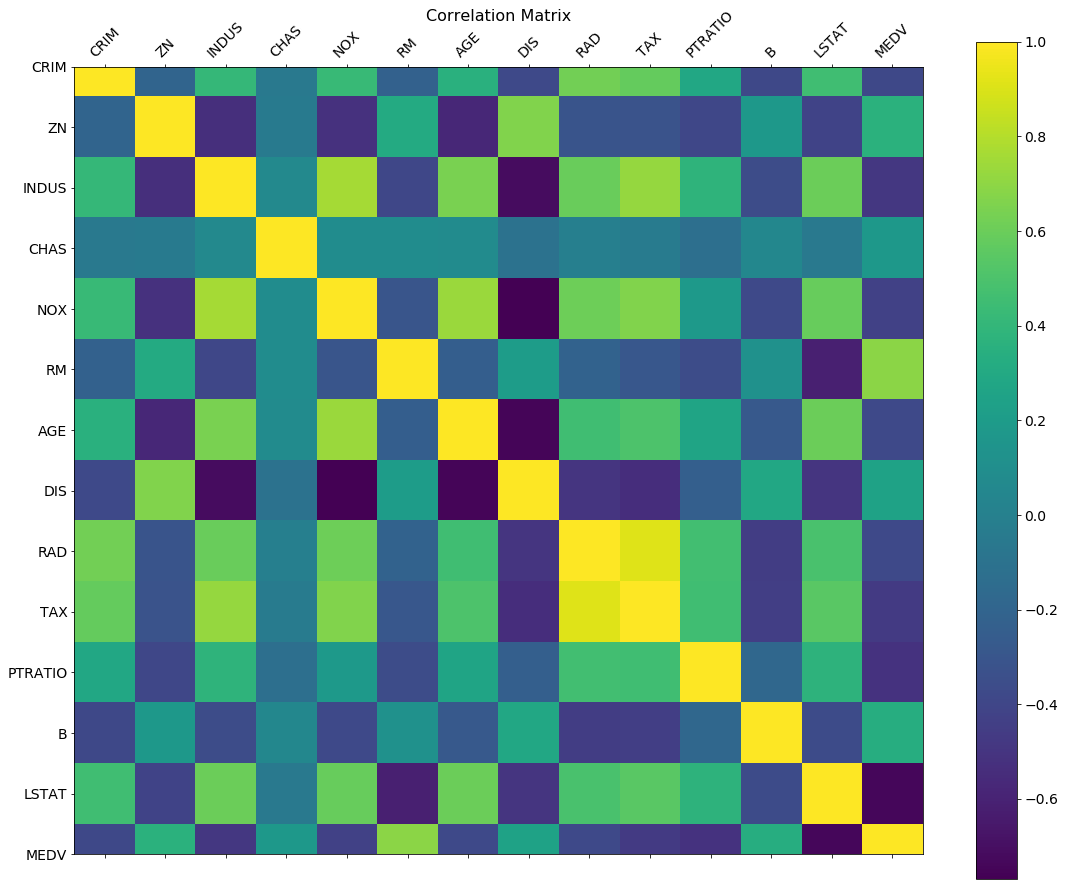

In [37]:
f = plt.figure(figsize = (19,15))
plt.matshow(boston.corr(), fignum = f.number)
plt.xticks(range(boston.shape[1]), boston.columns, fontsize = 14, rotation = 45)
plt.yticks(range(boston.shape[1]), boston.columns, fontsize = 14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title('Correlation Matrix', fontsize = 16);

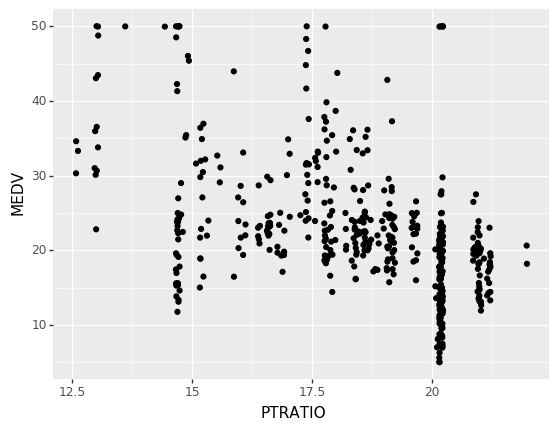

<ggplot: (-9223371898365045908)>

In [38]:
ggplot(aes(x = 'PTRATIO', y = 'MEDV'), data = boston) + geom_jitter()

In [60]:
Y = boston['MEDV']
X = boston["LSTAT"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

## linear regression b/w Lstst and Medv

Applicable for python/pyspark
instantita: sm.OLS(y,X) or linear model(x,y)

In [62]:
model = sm.OLS(Y_train, X_train)
model = model.fit()

In [64]:
model.predict(X_test)

173    10.305408
274     4.024125
491    20.599417
72      6.292683
452    19.687434
         ...    
110    14.819725
321     7.831654
265    11.912779
29     13.656946
262     6.737275
Length: 167, dtype: float64

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.438
Model:                            OLS   Adj. R-squared (uncentered):              0.436
Method:                 Least Squares   F-statistic:                              263.5
Date:                Mon, 07 Sep 2020   Prob (F-statistic):                    3.20e-44
Time:                        19:28:49   Log-Likelihood:                         -1472.0
No. Observations:                 339   AIC:                                      2946.
Df Residuals:                     338   BIC:                                      2950.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LSTAT          1.1400      0.070     16.234      0.000       1.002       1.278
==============================================================================
Omnibus:                        0.278   Durbin-Watson:                   1.563
Prob(Omnibus):                  0.870   Jarque-Bera (JB):                0.331
Skew:                           0.068   Prob(JB):                        0.848
Kurtosis:                       2.928   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
X_train

478    18.03
26     14.81
7      19.15
492    13.35
108    12.27
       ...  
106    18.66
270    13.00
348     5.99
435    23.27
102    10.63
Name: LSTAT, Length: 339, dtype: float64

In [67]:
X_train = sm.add_constant(X_train, prepend = False)

C:\Users\nstej\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [68]:
X_train

,LSTAT,const
478,18.03,1.0
26,14.81,1.0
7,19.15,1.0
492,13.35,1.0
108,12.27,1.0
...,...,...
106,18.66,1.0
270,13.00,1.0
348,5.99,1.0
435,23.27,1.0


In [69]:
model = sm.OLS(Y_train, X_train)
model = model.fit()

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     430.3
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           3.53e-62
Time:                        20:04:22   Log-Likelihood:                -1100.7
No. Observations:                 339   AIC:                             2205.
Df Residuals:                     337   BIC:                             2213.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LSTAT         -0.9805      0.047    -20.745      0.000      -1.074      -0.888
const         35.2252      0.681     51.722      0.000      33.886      36.565
==============================================================================
Omnibus:                       80.676   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.624
Skew:                           1.301   Prob(JB):                     5.33e-33
Kurtosis:                       4.937   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
X_test = sm.add_constant(X_test, prepend = False)

In [72]:
X_test

,LSTAT,const
173,9.04,1.0
274,3.53,1.0
491,18.07,1.0
72,5.52,1.0
452,17.27,1.0
...,...,...
110,13.00,1.0
321,6.87,1.0
265,10.45,1.0
29,11.98,1.0


In [73]:
predictions = model.predict(X_test)

In [74]:
predictions

173    26.361112
274    31.763871
491    17.506862
72     29.812602
452    18.291292
         ...    
110    22.478185
321    28.488877
265    24.978554
29     23.478333
262    29.430192
Length: 167, dtype: float64

In [76]:
print(mean_squared_error(y_test, predictions))

38.410075117662345


In [77]:
print(mean_squared_error(y_test, predictions)**0.5)

6.1975862331767795


In [79]:
y = boston['MEDV']
x= boston.drop(labels=['MEDV'], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 4)

In [80]:
Y_train_sqrt = Y_train**0.5
Y_test_sqrt = Y_test**0.5

In [81]:
X_train = sm.add_constant(X_train, prepend=False)

C:\Users\nstej\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [82]:
X_train

,LSTAT,const
42,5.81,1.0
346,12.67,1.0
372,8.88,1.0
83,7.51,1.0
463,10.29,1.0
...,...,...
385,30.81,1.0
197,8.61,1.0
439,22.88,1.0
174,9.64,1.0


In [84]:
model = sm.OLS(Y_train_sqrt, X_train)
model = model.fit()

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     553.3
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           4.48e-73
Time:                        20:29:45   Log-Likelihood:                -272.57
No. Observations:                 339   AIC:                             549.1
Df Residuals:                     337   BIC:                             556.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LSTAT         -0.0974      0.004    -23.522      0.000      -0.106      -0.089
const          5.8476      0.061     96.516      0.000       5.728       5.967
==============================================================================
Omnibus:                       58.221   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.162
Skew:                           1.001   Prob(JB):                     1.31e-21
Kurtosis:                       4.672   Cond. No.                         30.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
X_test = sm.add_constant(X_test, prepend=False)
predictions = model.predict(X_test)
print(mean_squared_error(y_test, predictions**2)) # MSE
print(mean_squared_error(y_test, predictions**2)**0.5) # RMSE

112.6283480143901
10.612650376526595


In [87]:
# First create a residual df. This should have Fitted and Residual Plots
residf = pd.DataFrame({"Residual":model.resid, # (Actual Train- Predicted Train) 
                       "Fitted":model.fittedvalues}) # Predicted on Train
residf

,Residual,Fitted
42,-0.251630,5.281541
346,-0.465884,4.613172
372,2.088637,4.982431
83,-0.330515,5.115910
463,-0.350614,4.845055
...,...,...
385,-0.162514,2.845795
197,0.495806,5.008737
439,-0.040705,3.618414
174,-0.154439,4.908384


C:\Users\nstej\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


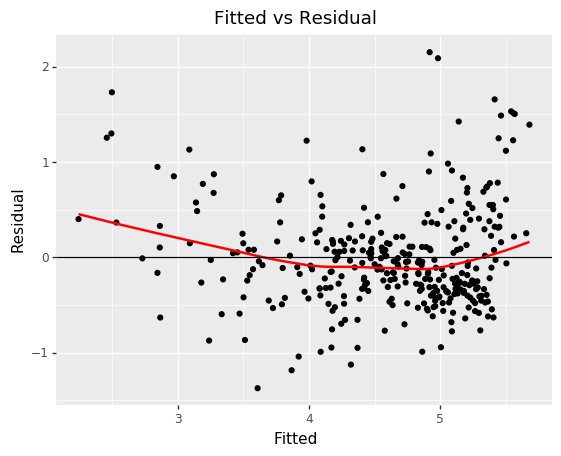

<ggplot: (-9223371898365040532)>

In [88]:
ggplot(aes(x="Fitted", y="Residual"), data=residf)+geom_point()+geom_smooth(color="red")+geom_hline(aes(yintercept=0))+ggtitle("Fitted vs Residual")

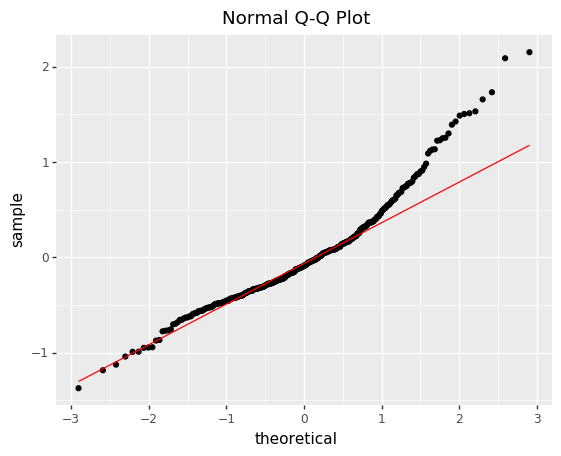

<ggplot: (-9223371898364964688)>

In [89]:
ggplot(aes(sample="Residual"), data=residf)+geom_qq()+geom_qq_line(color="red")+ggtitle("Normal Q-Q Plot")

In [90]:
residf["Residual_Std_abs_sqrt"] = (residf["Residual"]-residf["Residual"].mean())/residf["Residual"].std() # applying stanardiztion
residf["Residual_Std_abs_sqrt"] = (np.abs(residf["Residual_Std_abs_sqrt"]))**0.5 # Applying abs and sqrt
# the above Residual_Std_abs_sqrt is essentially the square root of absolute standardized residuals

C:\Users\nstej\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


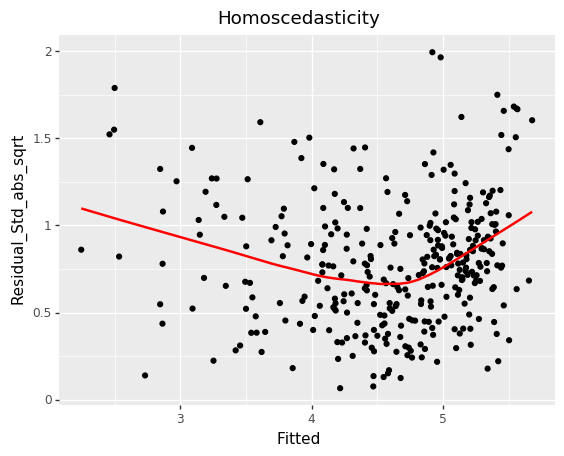

<ggplot: (-9223371898364971568)>

In [91]:
ggplot(aes(x="Fitted", y="Residual_Std_abs_sqrt"), data=residf)+geom_point()+geom_smooth(color="red")+ggtitle("Homoscedasticity")

In [92]:
from sklearn.linear_model import LinearRegression # this is a replacement for sm.OLS in statsmodels

In [94]:
lin_reg = LinearRegression() # Instantiate
lin_reg.fit(X_train, Y_train) # Fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
lin_reg.coef_ # Coefficients or Beta1,2,3,..

array([-0.87620822,  0.        ])

In [96]:
dict(zip(X_train.columns, lin_reg.coef_))

{'LSTAT': -0.8762082238236923, 'const': 0.0}

In [97]:
lin_reg.intercept_

33.15281120836962

In [98]:
predictions = lin_reg.predict(X_test) # Predict

In [99]:
print(mean_squared_error(y_test, predictions)) # MSE
print(mean_squared_error(y_test, predictions)**0.5) # RMSE

112.89537109064545
10.625223343094744


In [100]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [104]:
X_train_small = SelectKBest(f_regression, k=2).fit_transform(X_train, Y_train)

C:\Users\nstej\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\nstej\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\nstej\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\nstej\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\nstej\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)

In [105]:
pd.DataFrame(X_train_small)

,0,1
0,5.81,1.0
1,12.67,1.0
2,8.88,1.0
3,7.51,1.0
4,10.29,1.0
...,...,...
334,30.81,1.0
335,8.61,1.0
336,22.88,1.0
337,9.64,1.0


In [106]:
mean_plus_3d = boston.LSTAT.mean()+3*boston.LSTAT.std()
mean_minus_3d = boston.LSTAT.mean()-3*boston.LSTAT.std()

In [107]:
boston = boston[(boston.LSTAT>mean_minus_3d)&(boston.LSTAT<mean_plus_3d)]

In [108]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
